# (1)

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Dataset : https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()
cancer.keys()
# 乳がんデータの説明  https://newtechnologylifestyle.net/scikitlean_logistic/

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
import numpy as np
# DESCRよりMalignant(悪性)が212、 Benign(良性)が357。

print('0: ', np.count_nonzero(cancer.target == 0)) # Malignant
print('1: ', np.count_nonzero(cancer.target == 1)) # Benign

0:  212
1:  357


In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
print("データ件数", len(cancer.data))
print("次元数: ",cancer.data.ndim)
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
display(df)

データ件数 569
次元数:  2


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [11]:
len(df.columns)

30

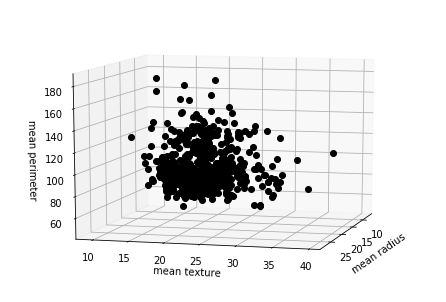

In [12]:
fig = plt.figure()
ax_3d = Axes3D(fig)
ax_3d.set_xlabel(cancer.feature_names[0])
ax_3d.set_ylabel(cancer.feature_names[1])
ax_3d.set_zlabel(cancer.feature_names[2])
ax_3d.view_init(elev=10, azim=15)
ax_3d.plot(cancer.data[:, 0], cancer.data[:, 1], cancer.data[:, 2],marker="o", linestyle='None', color='black' )
plt.show()

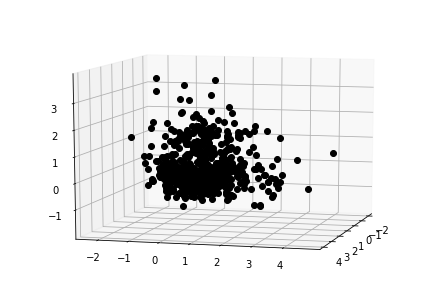

In [13]:
# 標準化 (単位系が違う時は標準化すること！ https://datachemeng.com/autoscaling_before_pca/ )
sc = StandardScaler()
sc.fit(cancer.data)
x_std = sc.transform(cancer.data)

# 試しに3D表現
fig = plt.figure()
ax_3d = Axes3D(fig)
ax_3d.view_init(elev=10, azim=15)
ax_3d.plot(x_std[:, 0], x_std[:, 1], x_std[:, 2],marker="o", linestyle='None', color='black' )
plt.show()

In [14]:
# 主成分分析
pca = PCA(n_components=2)
pca.fit(x_std)
x_pca = pca.transform(x_std)

print('shape:',x_pca.shape) 
print('寄与率:',pca.explained_variance_ratio_) #2次元での30次元のデータをおよそ６割表現できている。 0.44272026 0.18971182

shape: (569, 2)
寄与率: [0.44272026 0.18971182]


In [15]:
df_pca = pd.DataFrame(x_pca, columns=['pc1','pc2'])
df_pca = pd.concat([df_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)
df_pca_malignant = df_pca[df_pca['target']==0]
df_pca_benign = df_pca[df_pca['target']==1]

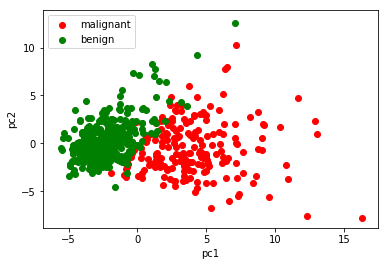

In [16]:
plt.scatter(df_pca_malignant['pc1'], df_pca_malignant['pc2'], color='red', label = 'malignant')
plt.scatter(df_pca_benign['pc1'], df_pca_benign['pc2'], color='green', label = 'benign')
plt.xlabel("pc1") 
plt.ylabel ("pc2")
plt.legend(loc='upper left')

# (2)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
pd.set_option('display.max_rows', 10)

In [18]:
iris = load_iris()

In [19]:
display(iris.keys())
display(iris.target_names)
display(iris.target)
display(pd.DataFrame(iris.data).info())
display(iris.feature_names)
# print(iris.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


None

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


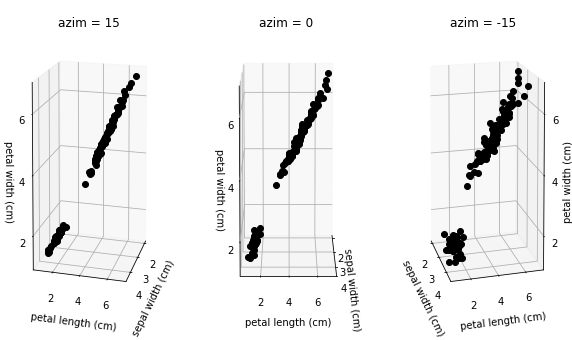

In [20]:
df_iris = pd.DataFrame(iris.data)
df_iris.columns = iris.feature_names
display(df_iris)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,3,1, projection='3d',azim = 15, elev = 10)
ax2 = fig.add_subplot(1,3,3, projection='3d',azim = -15, elev = 10)
ax3 = fig.add_subplot(1,3,2, projection='3d',azim = 0, elev = 10)

# ax_3d = Axes3D(fig)
# ax_3d.set_xlabel(iris.feature_names[0])
ax1.set_title( 'azim = 15')
ax1.set_xlabel(iris.feature_names[1])
ax1.set_ylabel(iris.feature_names[2])
ax1.set_zlabel(iris.feature_names[3])
#ax1.view_init(elev=10, azim=-15)
ax1.plot( iris.data[:, 1], iris.data[:, 2],  iris.data[:, 2], marker="o", linestyle='None', color='black' )

ax3.set_title( 'azim = 0')
ax3.set_xlabel(iris.feature_names[1])
ax3.set_ylabel(iris.feature_names[2])
ax3.set_zlabel(iris.feature_names[3])
ax3.plot( iris.data[:, 1], iris.data[:, 2],  iris.data[:, 2], marker="o", linestyle='None', color='black' )

ax2.set_title( 'azim = -15')
ax2.set_xlabel(iris.feature_names[1])
ax2.set_ylabel(iris.feature_names[2])
ax2.set_zlabel(iris.feature_names[3])
ax2.plot( iris.data[:, 1], iris.data[:, 2],  iris.data[:, 2], marker="o", linestyle='None', color='black' )

plt.show()

In [21]:
# 標準化
sc = StandardScaler()
sc.fit(iris.data)
x_std = sc.transform(iris.data)

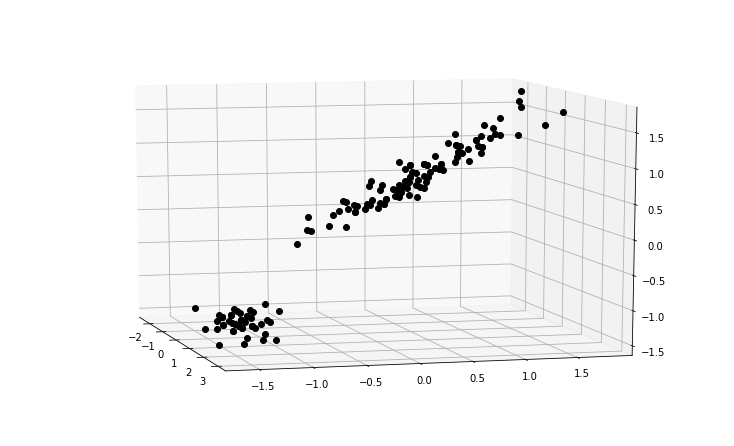

In [22]:
fig = plt.figure(figsize=(10,6))
ax_3d = Axes3D(fig)
# ax_3d.set_xlabel(iris.feature_names[1])
# ax_3d.set_ylabel(iris.feature_names[2])
# ax_3d.set_zlabel(iris.feature_names[3])
ax_3d.view_init(elev=10, azim=-15)
ax_3d.plot( x_std[:, 1], x_std[:, 2],  x_std[:, 2], marker="o", linestyle='None', color='black' )

plt.show()

In [23]:
# 主成分分析
pca = PCA(n_components=2)
pca.fit(x_std)
x_pca = pca.transform(x_std)

df_pca = pd.DataFrame(x_pca, columns=['pc1','pc2'])
df_pca = pd.concat([df_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)
df_pca_malignant = df_pca[df_pca['target']==0]
df_pca_benign = df_pca[df_pca['target']==1]

In [24]:
# 主成分分析前の次元
display(iris.data.shape)
display(x_pca.shape)

(150, 4)

(150, 2)

In [36]:
df_pca = pd.DataFrame(x_pca, columns = ['PC1','PC2'])
df_pca = pd.concat([df_pca, pd.DataFrame(iris.target, columns=['Target'])], axis =  1)
df_pca_0 = df_pca[df_pca.Target == 0]
df_pca_1 = df_pca[df_pca.Target == 1]
df_pca_2 = df_pca[df_pca.Target == 2]

df_pca

,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


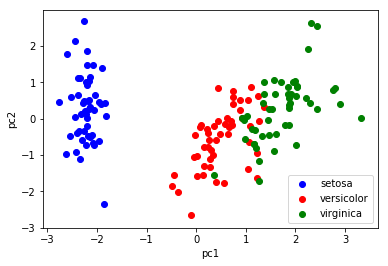

In [38]:
plt.scatter(df_pca_0['PC1'], df_pca_0['PC2'], color='blue', label = 'setosa')
plt.scatter(df_pca_1['PC1'], df_pca_1['PC2'], color='red', label = 'versicolor')
plt.scatter(df_pca_2['PC1'], df_pca_2['PC2'], color='green', label = 'virginica')
plt.xlabel("pc1") 
plt.ylabel("pc2") 
plt.legend()
#  'setosa', 'versicolor', 'virginica']

# ndarrayの要素指定方法を練習

In [26]:
import numpy as np
ndarray = np.array([[1,2,3],[4,5,6],[7,8,9]])
ndarray

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [27]:
ndarray[:,0]

array([1, 4, 7])

# DataFrameの行をSeriesのBoolで取り出す

In [28]:
df_test = pd.DataFrame({'a': ['1st', '2nd','3rd']})
display(type(pd.Series([True,False,True])))
display(df_test[pd.Series([True,False,False])])
display(df_test[pd.Series([True,False,True])])

pandas.core.series.Series

,a
0,1st


,a
0,1st
2,3rd
